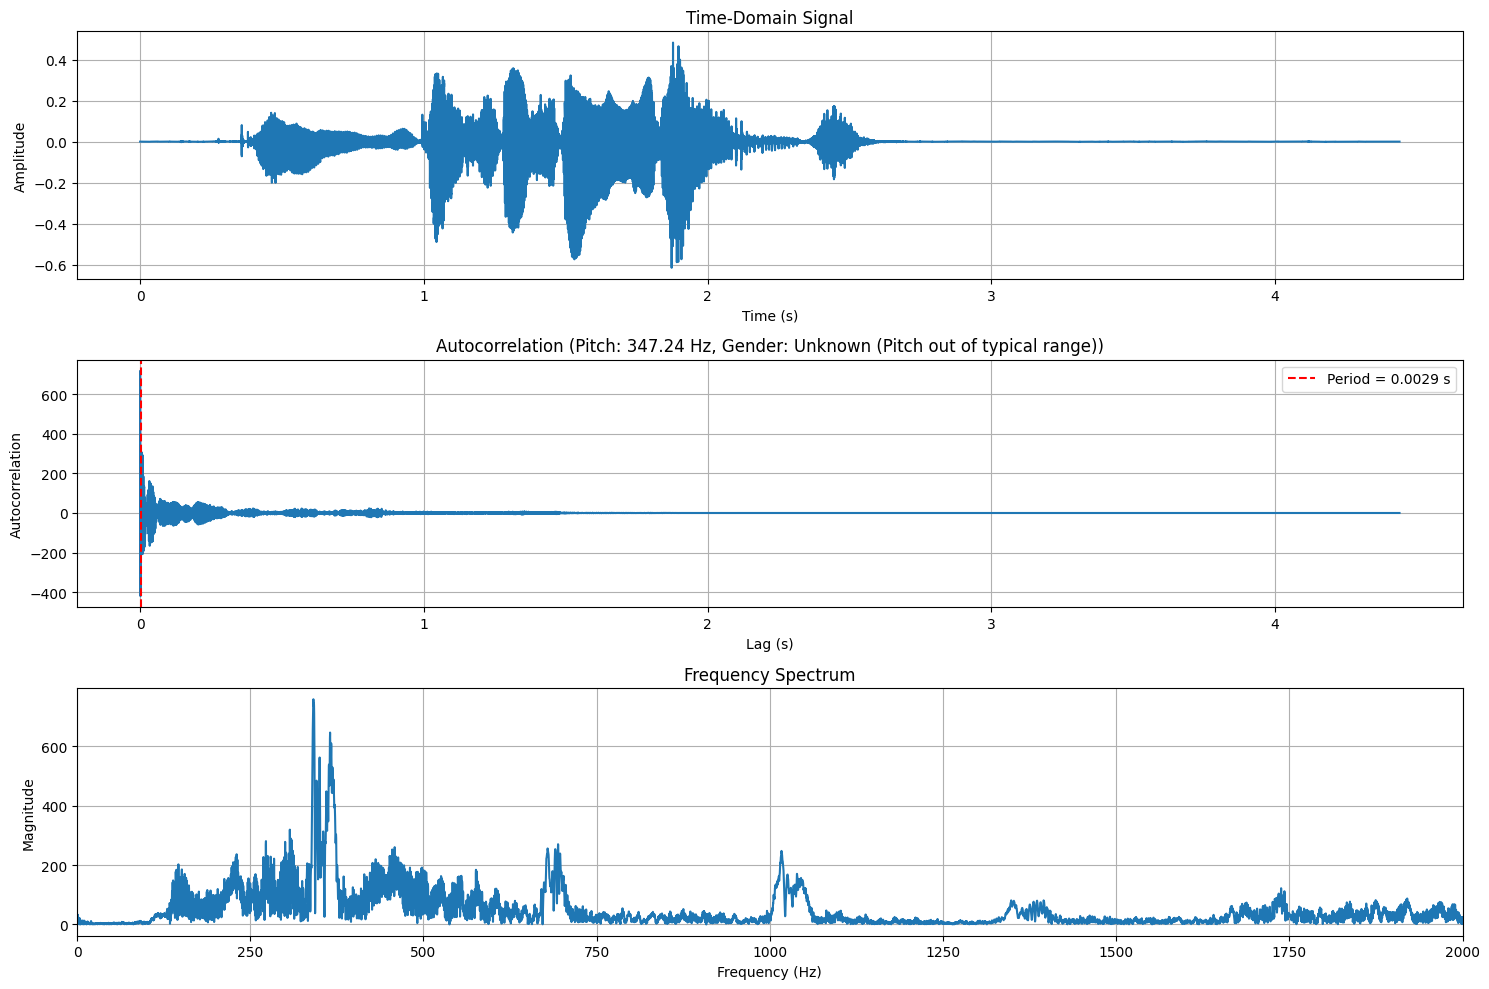

In [4]:
# Pitch Detection and Gender Classification Using Audio Signal Analysis: A Computational Approach
import numpy as np
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio

# Load audio file (replace 'sample9.wav' with your file name)
audio_file = 'female_voice.wav'  # Replace with your audio file
signal, fs = librosa.load(audio_file, sr=None)  # Load with original sampling rate, #signal store the audio samples, while fs store sampling rate

# Create time array
duration = len(signal) / fs
t = np.linspace(0, duration, len(signal))

# Compute autocorrelation to estimate pitch
autocorr = librosa.autocorrelate(signal, max_size=len(signal))
autocorr[0] = 0  # Set zero-lag to 0
lags = np.arange(len(autocorr))
min_lag = int(fs / 1000)  # Minimum lag
first_peak_idx = np.argmax(autocorr[min_lag:]) + min_lag
period_samples = first_peak_idx
pitch_hz = fs / period_samples if period_samples > 0 else 0

# Gender classification based on pitch
if 85 <= pitch_hz <= 180:
    gender = "Male"
elif 165 <= pitch_hz <= 255:
    gender = "Female"
else:
    gender = "Unknown (Pitch out of typical range)"

# Compute FFT for frequency spectrum
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(fft_result), 1/fs)
magnitude = np.abs(fft_result)
pos_mask = frequencies > 0
frequencies = frequencies[pos_mask]
magnitude = magnitude[pos_mask]

# Visualize results
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
plt.plot(t, signal)
plt.title('Time-Domain Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(lags / fs, autocorr)
plt.axvline(first_peak_idx / fs, color='r', linestyle='--', label=f'Period = {first_peak_idx/fs:.4f} s')
plt.title(f'Autocorrelation (Pitch: {pitch_hz:.2f} Hz, Gender: {gender})')
plt.xlabel('Lag (s)')
plt.ylabel('Autocorrelation')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(frequencies, magnitude)
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 2000)
plt.grid(True)

plt.tight_layout()
plt.show()

# Play the audio
Audio(signal, rate=fs)